                                            mensagem  target
0  WASHINGTON (Reuters) - Transgender people will...       1
1  WASHINGTON (Reuters) - The special counsel inv...       1
2  The following statements were posted to the ve...       1
3  (Reuters) - Alabama officials on Thursday cert...       1
4  NEW YORK/WASHINGTON (Reuters) - The new U.S. t...       1
Acurácia com TF-IDF (k=3): 0.86
Acurácia com TF-IDF (k=4): 0.90
Acurácia com TF-IDF (k=5): 0.93
Acurácia com TF-IDF (k=6): 0.93
Acurácia com TF-IDF (k=7): 0.94
Acurácia com TF-IDF (k=8): 0.89
Acurácia com TF-IDF (k=9): 0.94
Acurácia com TF-IDF (k=10): 0.97
Acurácia com TF-IDF (k=11): 0.94
Acurácia com TF-IDF (k=12): 0.99
Acurácia com TF-IDF (k=13): 0.97
Acurácia com TF-IDF (k=14): 0.96
Melhor Acurácia com TF-IDF (k=12): 0.99
Acurácia média com validação cruzada (TF-IDF): 0.90 ± 0.06
Matriz de Confusão:
[[34  1]
 [ 2 43]]
Especificidade: 0.97
Sensibilidade : 0.96
Acurácia      : 0.96
Precisão      : 0.98
Recall        : 0.96
F1

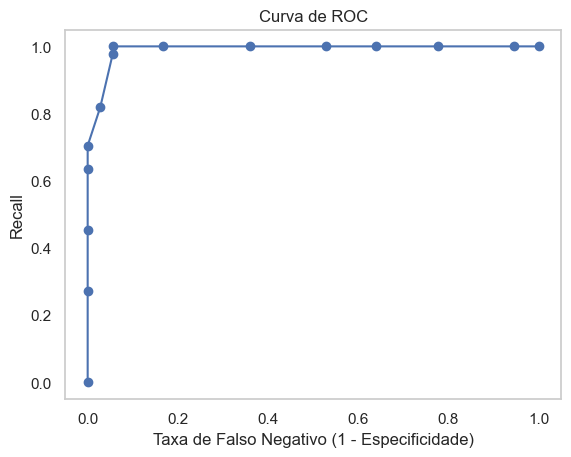

C:\Users\Ander\AppData\Local\Temp\ipykernel_18108\685017677.py:109: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  _ = sns.barplot(x='k', y='acuracia', data=results, ax=ax, palette='Blues')


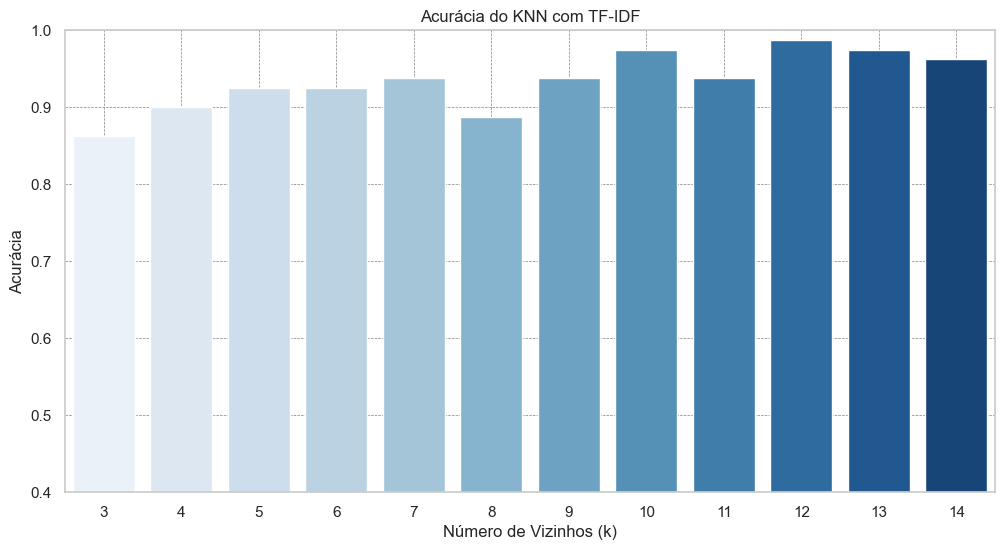

In [ ]:
import pandas as pd
import numpy as np
from sklearn import preprocessing, model_selection, neighbors, metrics
from sklearn.feature_extraction import text
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn  as sns

urlTrue="True.csv", # "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/refs/heads/main/True.csv"
urlFake="Fake.csv", # "https://raw.githubusercontent.com/professortiagoinfnet/inteligencia_artificial/refs/heads/main/Fake.csv"

def carrega_dados(url, valorpadrao):
    df = pd.read_csv(url, sep=',', header=None, encoding='utf-8')
    df.columns = ['titulo', 'mensagem', 'categoria','data']
    df=df.drop(columns=['titulo','categoria','data'])
    df.insert(loc=1, column='target', value=valorpadrao)
    return df

def classificar(modelo, atributo, classe):
    treino_a, teste_a, treino_c, teste_c = model_selection.train_test_split(atributo, classe, train_size=0.8, random_state=42)
    modelo.fit(treino_a, treino_c)
    previstos = modelo.predict(teste_a)
    acuracia = metrics.accuracy_score(previstos, teste_c)
    return acuracia


# Criando DataFrames para as notícias verdadeiras e falsas
dfTrue = carrega_dados("True.csv", 1)
dfFalse = carrega_dados("Fake.csv", 0)
df = pd.concat([dfTrue, dfFalse], ignore_index=True)
print(df.head())



# Ativadade 1 - Criação das features: computar TF-IDF (Term Frequency-Inverse Document Frequency)
vetorizador = text.TfidfVectorizer()
tfidf = vetorizador.fit_transform(df['mensagem'])
tfidf_df = pd.DataFrame(tfidf.toarray(), columns=vetorizador.get_feature_names_out())
atributos_tfidf = tfidf_df
classes_tfidf = df['target']

# Atividade 2 - Modelagem: classificar as notícias usando o KNN
model_list=[]
melhor_k = 0
melhor_acuracia = 0.0
for k in range(3, 15):
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    acuracia_tfidf = classificar(knn, atributos_tfidf, classes_tfidf)
    print(f"Acurácia com TF-IDF (k={k}): {acuracia_tfidf:.2f}")
    model_list.append({"k": k, "acuracia": acuracia_tfidf})
    if acuracia_tfidf > melhor_acuracia:
        melhor_acuracia = acuracia_tfidf
        melhor_k = k

print(f"Melhor Acurácia com TF-IDF (k={melhor_k}): {melhor_acuracia:.2f}")
sns.set(style="whitegrid")

# Atividade 3 - Aplicar técnicas de validação cruzada
results_tfidf = model_selection.cross_val_score(knn, atributos_tfidf, classes_tfidf, cv=10)
print(f"Acurácia média com validação cruzada (TF-IDF): {results_tfidf.mean():.2f} ± {results_tfidf.std():.2f}")

# Atividade 4 - Avaliação de classificadores binarios
treino_a, teste_a, treino_c, teste_c = model_selection.train_test_split(atributos_tfidf, classes_tfidf, train_size=0.8, random_state=42)
knn.fit(treino_a, treino_c)
previstos = knn.predict(teste_a)
y_probs = knn.predict_proba(teste_a)[:, 1]
conf_matrix = confusion_matrix(previstos, teste_c)
print("Matriz de Confusão:")
print(conf_matrix)

((TN, FP), (FN, TP)) = conf_matrix
especificidade = TN / (TN + FP)
sensibilidade = TP / (TP + FN)
acuracia = metrics.accuracy_score(previstos, teste_c)
precisao = metrics.precision_score(previstos, teste_c)
recall = metrics.recall_score(previstos, teste_c)
f1_score = metrics.f1_score(previstos, teste_c)

print(f"Especificidade: {especificidade:.2f}")
print(f"Sensibilidade : {sensibilidade:.2f}")
print(f"Acurácia      : {acuracia:.2f}")
print(f"Precisão      : {precisao:.2f}")
print(f"Recall        : {recall:.2f}")
print(f"F1 Score      : {f1_score:.2f}")

print("Relatório de Classificação:")
print(classification_report(classes_tfidf, knn.predict(atributos_tfidf)))

fpr, tpr, thresholds = metrics.roc_curve(teste_c, y_probs)
plt.plot(fpr, tpr, marker='o')
auc = metrics.roc_auc_score (teste_c, y_probs)
print (auc)
plt.xlabel('Taxa de Falso Negativo (1 - Especificidade)')
plt.ylabel('Recall')
plt.title('Curva de ROC')
plt.grid()
plt.show()

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)
_ = sns.barplot(x='k', y='acuracia', data=results, ax=ax, palette='Blues')
ax.set_title('Acurácia do KNN com TF-IDF')
ax.set_ylabel('Acurácia')
ax.set_xlabel('Número de Vizinhos (k)')
ax.set_ylim(0.4, 1.0)
ax.grid(which='both', color='gray', linestyle='--', linewidth=0.5)
